# Lead Scoring Case Study Solution

## Problem Statement:

The aim of this project is to analyze and predict lead scores using logistic regression. Lead scores are numerical values assigned to leads based on various attributes and behaviors exhibited by potential customers. By accurately predicting lead scores, businesses can identify high-value leads and allocate resources more efficiently, leading to higher conversion rates and increased revenue.


## Dataset Description:

The dataset provided contains information about leads and various attributes associated with them. Below is a description of the columns present in the dataset:

- Prospect ID: Unique identifier for each lead prospect.
- Lead Number: Unique identifier for each lead.
- Lead Origin: The origin from which the lead was generated (e.g., API, Landing Page Submission).
- Lead Source: The source through which the lead was acquired (e.g., Organic Search, Direct Traffic).
- Do Not Email: Indicates whether the lead has opted out of email communication (Yes/No).
- Do Not Call: Indicates whether the lead has opted out of phone calls (Yes/No).
- Converted: Indicates whether the lead has been converted into a customer (1 for converted, 0 for not converted).
- TotalVisits: Total number of visits made by the lead on the company's website.
- Total Time Spent on Website: Total time (in seconds) spent by the lead on the company's website.
- Page Views Per Visit: Average number of pages viewed per visit by the lead.
- Last Activity: Last activity performed by the lead before becoming inactive.
- Country: Country of the lead.
- Specialization: Specialization of the lead (if any).
- How did you hear about X Education: Method through which the lead heard about X Education.
- What is your current occupation: Current occupation of the lead.
- What matters most to you in choosing a course: Factors influencing the lead's choice of course.
- Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses: Binary indicators of various marketing channels or activities.
- Tags: Tags assigned to the lead.
- Lead Quality: Quality of the lead.
- Update me on Supply Chain Content, Get updates on DM Content: Preferences of the lead for content updates.
- Lead Profile: Profile of the lead.
- City: City of the lead.
- Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score: Metrics related to the lead's activity and profile.
- I agree to pay the amount through cheque: Indicates whether the lead agrees to pay via cheque (Yes/No).
- A free copy of Mastering The Interview: Indicates whether the lead is interested in a free copy of Mastering The Interview (Yes/No).
- Last Notable Activity: Last notable activity performed by the lead.

## Goal of the Project:

By analyzing the information provided in the dataset and applying logistic regression techniques, aiming to build a predictive model for lead scoring, which can help businesses prioritize and effectively manage their leads for better conversion rates and revenue generation.

## Following steps are followed in this Project

- Reading, Understanding and the data
- Data Cleaning
- Visualising the data
- Preparing the data for modelling (train-test split, rescaling etc.)
- Training the model
- Prediction and evaluation on the test set

#

## Step 1: Reading and Understanding the Data

### 1.1: Importing necessary Python Libraries

In [1]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import numpy, pandas and matplotlib visualisation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Import libraries required for regression modelling

import statsmodels
import sklearn

### 1.2: Reading Dataset

In [4]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
print('Total Entries:',lead.shape[0])
print('Total Columns:',lead.shape[1])

Total Entries: 9240
Total Columns: 37


In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Finding the null percentages across columns
round(lead.isnull().sum()/9240,2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

<span style="color:Green">
    
### Observation from above:
- **There are 37 columns and 9240 entries in the Lead.csv dataset**
- **There are varies null values in the multiple columns which need to be rectified based on requirements.**

#

## Step 2: Data Cleaning

### 2.1: Drop columns which have more than 40% Null Values

In [8]:
# Display columns which have more than 40% null values

lead[['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality']].sample(5)

,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Quality
2073,03.Low,02.Medium,11.0,14.0,Worst
5248,NaN,NaN,NaN,NaN,NaN
1565,02.Medium,01.High,15.0,19.0,Might be
1182,01.High,01.High,16.0,18.0,NaN
4976,NaN,NaN,NaN,NaN,Worst


In [9]:
# Drop columns with more than 40% Null Values
lead = lead.drop(columns = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'])

### 2.2: Tags Column

In [10]:
# 'Tags' column has 36% Null Values
lead[['Tags']].value_counts()

Tags                                             
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS    



- **'Tags' Column seems irrelevant for analysis. Hence Drop the column.**

In [11]:
# Drop 'Tags' column
lead = lead.drop('Tags', axis = 'columns')

### 2.3: 'What is your current occupation' Column

In [12]:
# This column has 29% null values
lead[['What is your current occupation']].value_counts()

What is your current occupation
Unemployed                         5600
Working Professional                706
Student                             210
Other                                16
Housewife                            10
Businessman                           8
Name: count, dtype: int64



- **Customer Occupation plays important role in selling products. Hence to deal with Null values, replacing Null values with 'Other' Category**

In [13]:
# Replace Null values with 'Other' Category
lead[['What is your current occupation']] = lead[['What is your current occupation']].replace(np.nan, 'Other')


### 2.4: 'What matters most to you in choosing a course' Column

In [14]:
lead['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


- **Reason for choosing the product has most values as 'Better Career Prospects' followed by Null values. Hence almost all prospects choose 'Better Career Prospects' category. So droping this column as it holds less relevance**

In [15]:
lead = lead.drop('What matters most to you in choosing a course', axis = 'columns')

### 2.5: Lead Profile column

In [16]:
# 'Lead Profile' column have 29% Null Values
lead['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

<span style="color:Green">

- **Lead Profile seems not relevant for analyis. Hence drop the column**

In [17]:
lead = lead.drop('Lead Profile', axis = 'columns')

### 2.6: Country Column

In [18]:
lead['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays


- **Country column seems not relevant for analyis. Hence drop the column**

In [19]:
lead = lead.drop('Country', axis = 'columns')

### 2.7: 'How did you hear about X Education' column

In [20]:
lead['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64


- **'How did you hear about X Education' column seems not relevant for analyis. Hence drop the column**

In [21]:
lead = lead.drop('How did you hear about X Education', axis = 'columns')

### 2.8: 'Specialization' Column

In [22]:
lead['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64


- **'Specialization' column is important for analyis. Hence keeping the column is necessary. Null Values to be replaced with existing 'Select' Category**

In [23]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Select')

### 2.9: 'City' Column

In [24]:
lead['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64


- **'City' column is important for analyis. Hence keeping the column is necessary. Null Values to be replaced with existing 'Select' Category**

In [25]:
lead['City'] = lead['City'].replace(np.nan, 'Select')

### 2.10: 'TotalVisits', 'Page Views Per Visit',  'Last Activity' Columns

In [26]:
lead['TotalVisits'].isnull().sum()

137

In [27]:
lead['Page Views Per Visit'].isnull().sum()

137

In [28]:
lead['Last Activity'].isnull().sum()

103


- **'TotalVisits', 'Page Views Per Visit',  'Last Activity' Columns have minimal Null values. Hence drop rows with null values**

In [29]:
# Dropping the rows with null values
lead.dropna(inplace = True)

In [30]:
lead.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 


- **All the null values in the dataframe is eliminated.**
- **Dataframe is ready for Data Visualization.**

#

## Step 3: Data Visualization

In [31]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                            

### 3.1: Checking for duplicate values

In [32]:
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### 3.2: 'Converted' Column Analysis
- **'Converted' Column is the target variable. 1 indicates that lead is "successfully converted" and 0 indicates "not converted". Hence analysis need to be centered around this variable.**


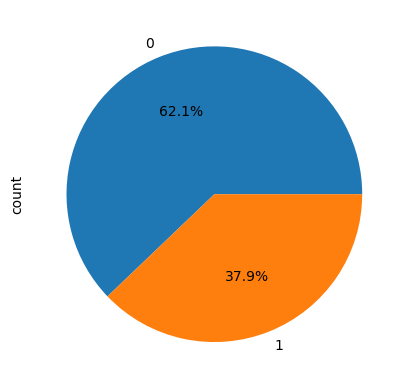

In [33]:
lead['Converted'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()


### Inference from Above Graph    
    
- **Over 62% of leads are lost or not converted successfully. Only 38% of leads are successfully converted. Hence we can say success rate is around 38%**

### 3.3: 'Lead Origin' Column Analysis w.r.t 'Converted' Column

In [34]:
lead['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64

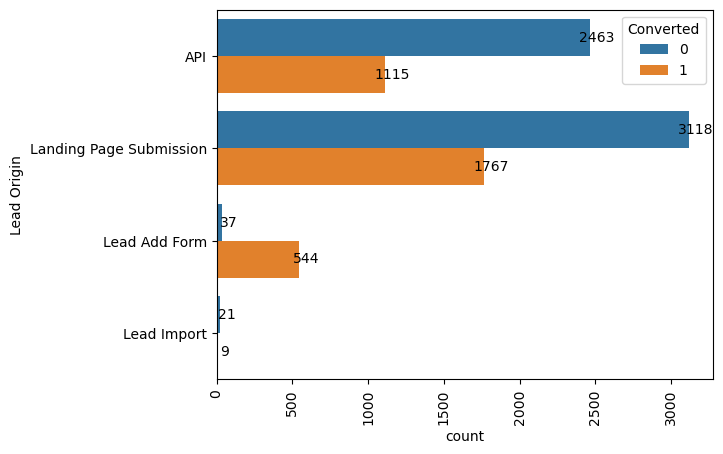

In [35]:
# Create a count plot
ax = sns.countplot(y="Lead Origin", hue="Converted", data=lead)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha = 'center', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points')
plt.show()


### Inference from above graph

- **API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.**
- **Lead Add Form has more than 90% conversion rate but count of lead are not very high.**
- **Lead Import are very less in count.**

**To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**

### 3.4: 'Lead Source' Column Analysis w.r.t 'Converted' Column

In [36]:
lead['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


- **There are 2 variables named 'Google' and 'google'. Replacing 'google' with'Google'**
- **Columns which have less than 100 value counts have less importance than top 5 variables with highest value counts. Hence adding them to 'Others' Category.**

In [37]:
# Replace 'google' with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')

In [38]:
# Creating 'Others' category and adding all categories with less than 100 value counts into 'Others'
Others_Category = ['Welingak Website','Referral Sites','Facebook','bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM']
lead['Lead Source'] = lead['Lead Source'].replace(Others_Category, 'Others')

In [39]:
lead['Lead Source'].value_counts()

Lead Source
Google            2873
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Others             308
Name: count, dtype: int64

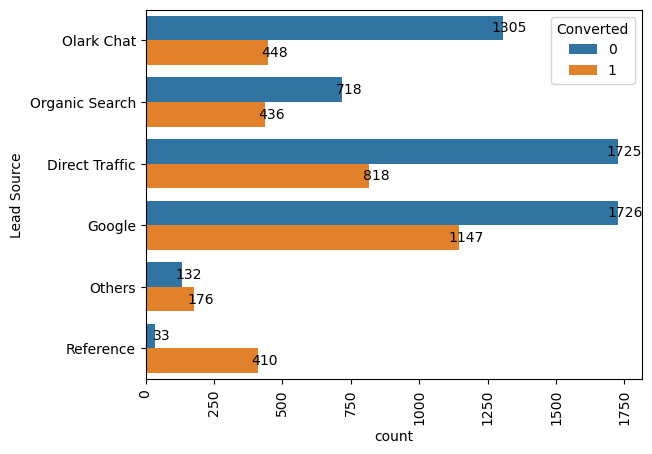

In [40]:
# Create a count plot
ax = sns.countplot(y="Lead Source", hue="Converted", data=lead)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha = 'center', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points')
plt.show()

  
### Inference from above graph
    
- **Google and Direct traffic generates maximum number of leads.**
- **Conversion Rate of reference leads and leads through welingak website is high.**

**To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.**

### 3.5: 'Do Not Email' & 'Do Not Call' Columns analysis w.r.t 'Converted' Column

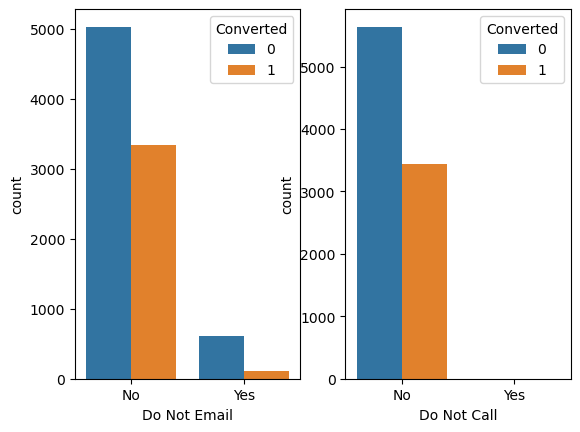

In [41]:
plt.subplot(1,2,1)
sns.countplot(x="Do Not Email", hue="Converted", data=lead)
plt.subplot(1,2,2)
sns.countplot(x="Do Not Call", hue="Converted", data=lead)
plt.show()

  
### Inference from above graph
- **Most entries are 'No'. No Inference can be drawn with these parameter.**

### 3.6: 'TotalVisits' Column analysis w.r.t 'Converted' Column

In [42]:
lead['TotalVisits'].value_counts()

TotalVisits
0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64


- **There are too many value_counts ranging from 0 to 42. So need to create bins of 5 intervals.**

In [43]:
# Creating bins for 'TotalVisits' column

bin_edges = [-1, 6, 11, 16, 21, float('inf')] 
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21+']
lead['TotalVisits_bins'] = pd.cut(lead['TotalVisits'], bins=bin_edges, labels=bin_labels, right=False)

In [44]:
lead = lead.drop('TotalVisits', axis = 'columns')

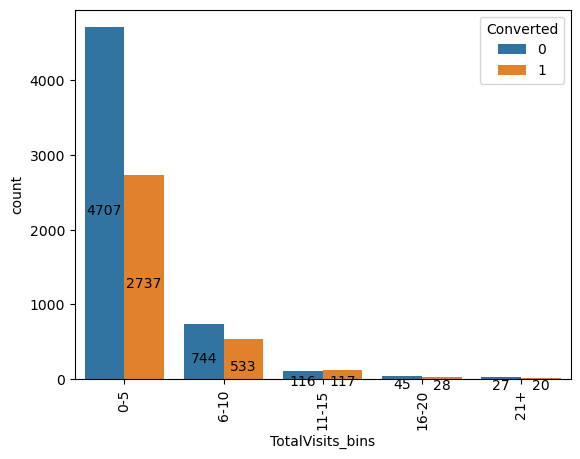

In [45]:
ax = sns.countplot(x="TotalVisits_bins", hue="Converted", data=lead)
plt.xticks(rotation=90)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='top')

plt.show()


### Inference from above graph
    
- **Lead likely to be converted as if the total visits are incresed.** 

### 3.7: 'Total Time Spent on Website' Column analysis w.r.t 'Converted' Column

In [46]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

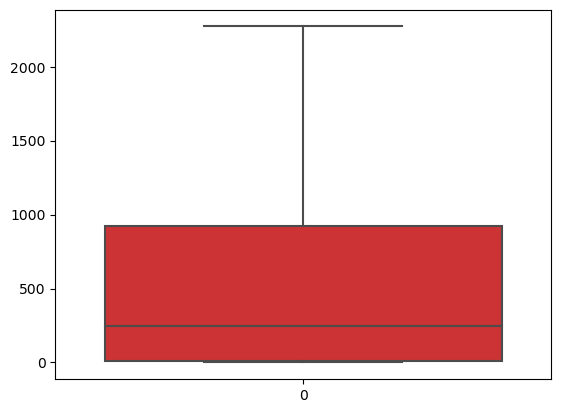

In [47]:
sns.boxplot(lead['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()

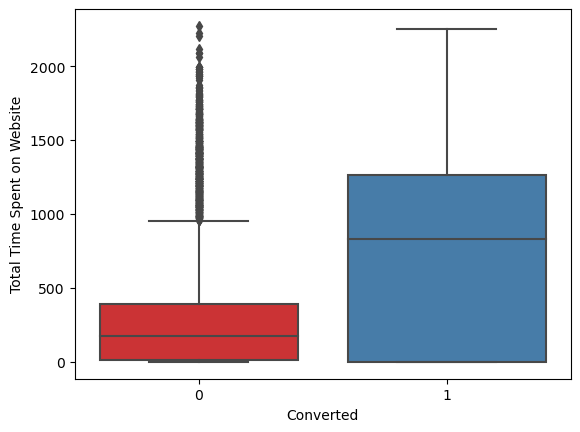

In [48]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead,palette='Set1')
plt.show()

  
### Inference from above graph
    
- **Total time spent Median of ''Converted' is more than 'Not Converted' shows Leads spending more time on the weblise are more likely to be converted.**

- **Website should be made more engaging to make leads spend more time.**

### 3.8: 'Page Views Per Visit' Column analysis w.r.t 'Converted' Column

In [49]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

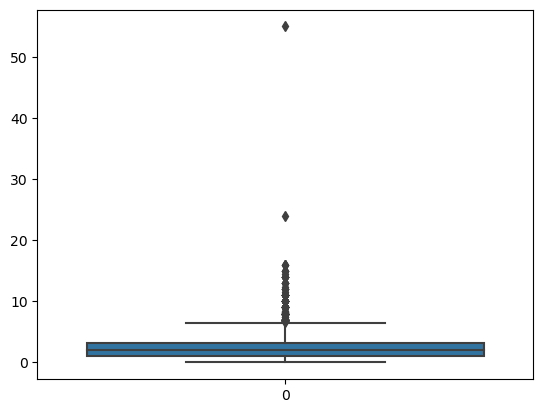

In [50]:
sns.boxplot(lead['Page Views Per Visit'])
plt.show()


- **The value counts are distributed between 0 to 55. But most of the values are concentrated within 5.**
- **Creting bins for this column for easy analysis**

In [51]:
# Create bins for this column
bin_edges = [-1, 6, 11, 16,  float('inf')] 
bin_labels = ['0-5', '6-10', '11-15', '16+']
lead['Page Views Per Visit_bins'] = pd.cut(lead['Page Views Per Visit'], bins=bin_edges, labels=bin_labels, right=False)

In [52]:
lead[['Page Views Per Visit_bins','Page Views Per Visit']].sample(15)

,Page Views Per Visit_bins,Page Views Per Visit
4505,0-5,4.0
5982,0-5,1.0
1170,0-5,4.0
2591,6-10,6.0
1855,0-5,2.0
6627,0-5,2.0
1070,0-5,5.0
1730,0-5,1.0
7876,0-5,1.0
872,0-5,4.0


In [53]:
# Drop 'Page Views Per Visit' column and only retain 'Page Views Per Visit_bins'
lead = lead.drop('Page Views Per Visit', axis = 'columns')

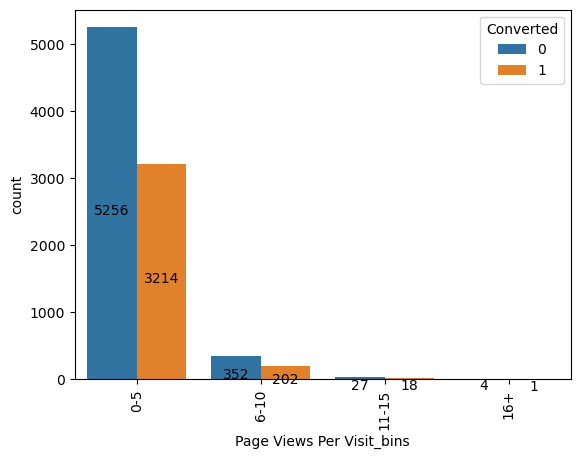

In [54]:
ax = sns.countplot(x="Page Views Per Visit_bins", hue="Converted", data=lead)
plt.xticks(rotation=90)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='top')

plt.show()


### Inference from above graph
    
- **Most of the values are concentrated in 0-5 bin. Also both 'Converted' and 'Non Converted' are in 0-5 bin. Nothing can be said specifically for lead conversion from Page Views Per Visit.**

### 3.9: 'Last Activity' Column analysis w.r.t 'Converted' Column

In [55]:
lead['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

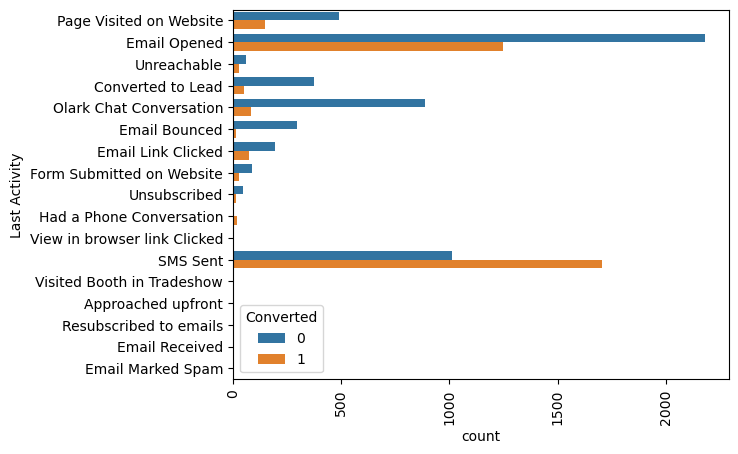

In [56]:
sns.countplot(y = "Last Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [57]:
# Creting 'Other Activity' category from categories which have less than 100 value counts.
Others_category = ['Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails']
lead['Last Activity'] = lead['Last Activity'].replace(Others_category,'Other Activity')

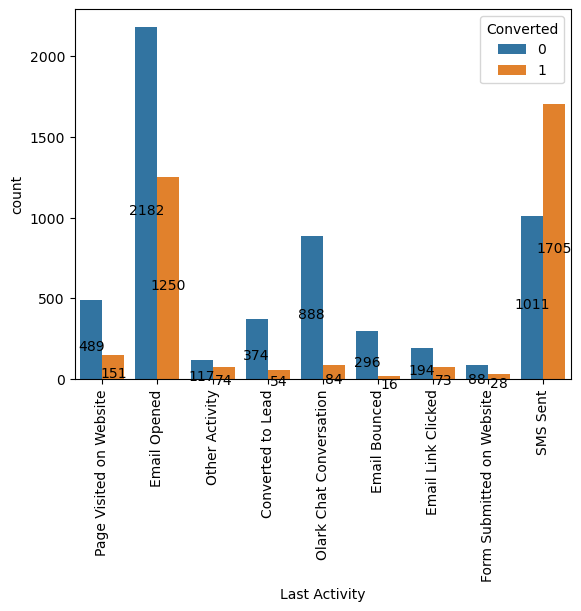

In [58]:
ax = sns.countplot(x="Last Activity", hue="Converted", data=lead)
plt.xticks(rotation=90)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='top')

plt.show()


### Inference from above graph
    
- **Most of the lead have their Email opened as their last activity.**
- **Conversion rate for leads with last activity as SMS Sent is almost 60%.**

### 3.10: 'Specialization' Column analysis w.r.t 'Converted' Column

In [59]:
lead['Specialization'].value_counts()

Specialization
Select                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

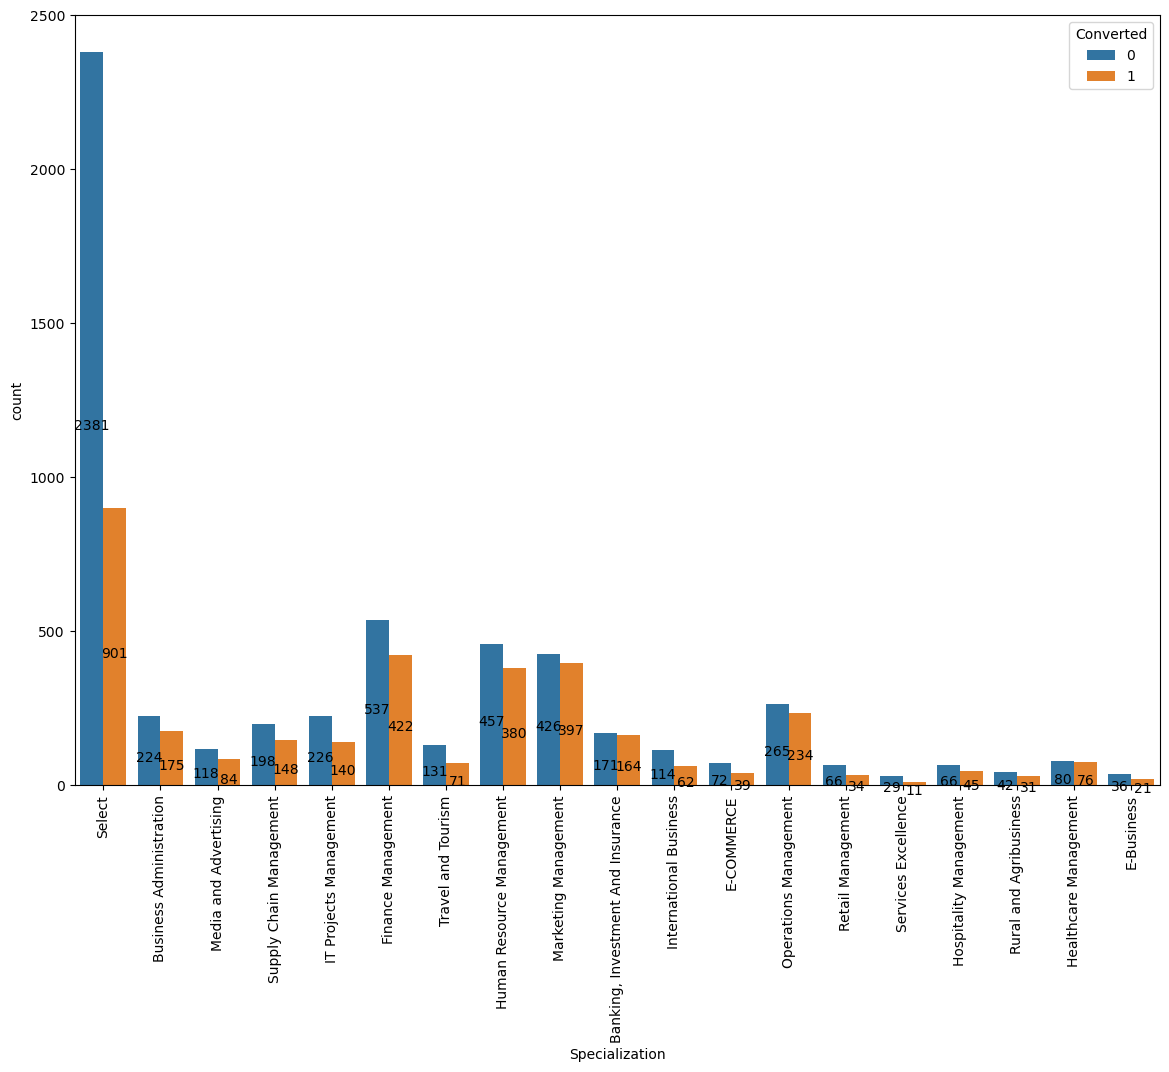

In [60]:
plt.figure(figsize = (14,10))
ax = sns.countplot(x="Specialization", hue="Converted", data=lead)
plt.xticks(rotation=90)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='top')

plt.show()


#### Inference from above graph
    
- **Most of leads did not reveal their specialization ('Select'). Focus should be more on the Specialization with high conversion rate.**

### 3.11: 'What is your current occupation' Column analysis w.r.t 'Converted' Column

In [61]:
lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5476
Other                   2698
Working Professional     677
Student                  206
Housewife                  9
Businessman                8
Name: count, dtype: int64

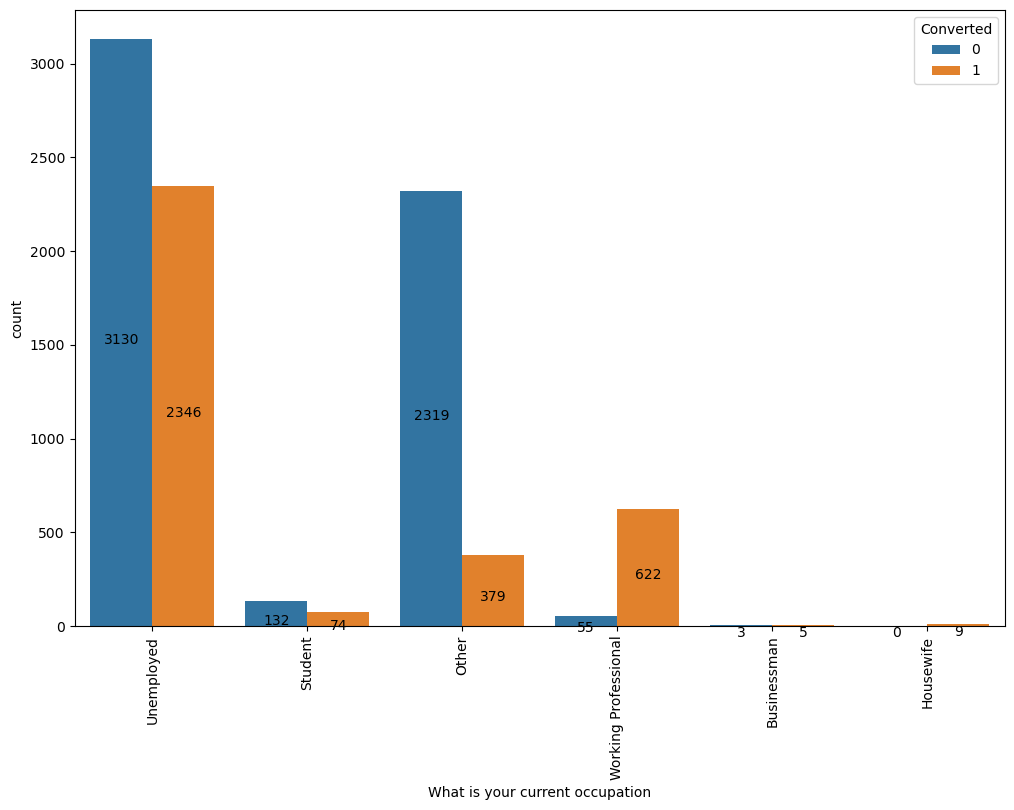

In [62]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x="What is your current occupation", hue="Converted", data=lead)
plt.xticks(rotation=90)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='top')

plt.show()

  
### Inference from above graph
    
- **Working Professionals going for the course have high chances of joining it.**
- **Unemployed leads are the most in numbers but has around 30-35% conversion rate.**

### 3.12: Analysing columns having 'Yes' or 'No' Categories

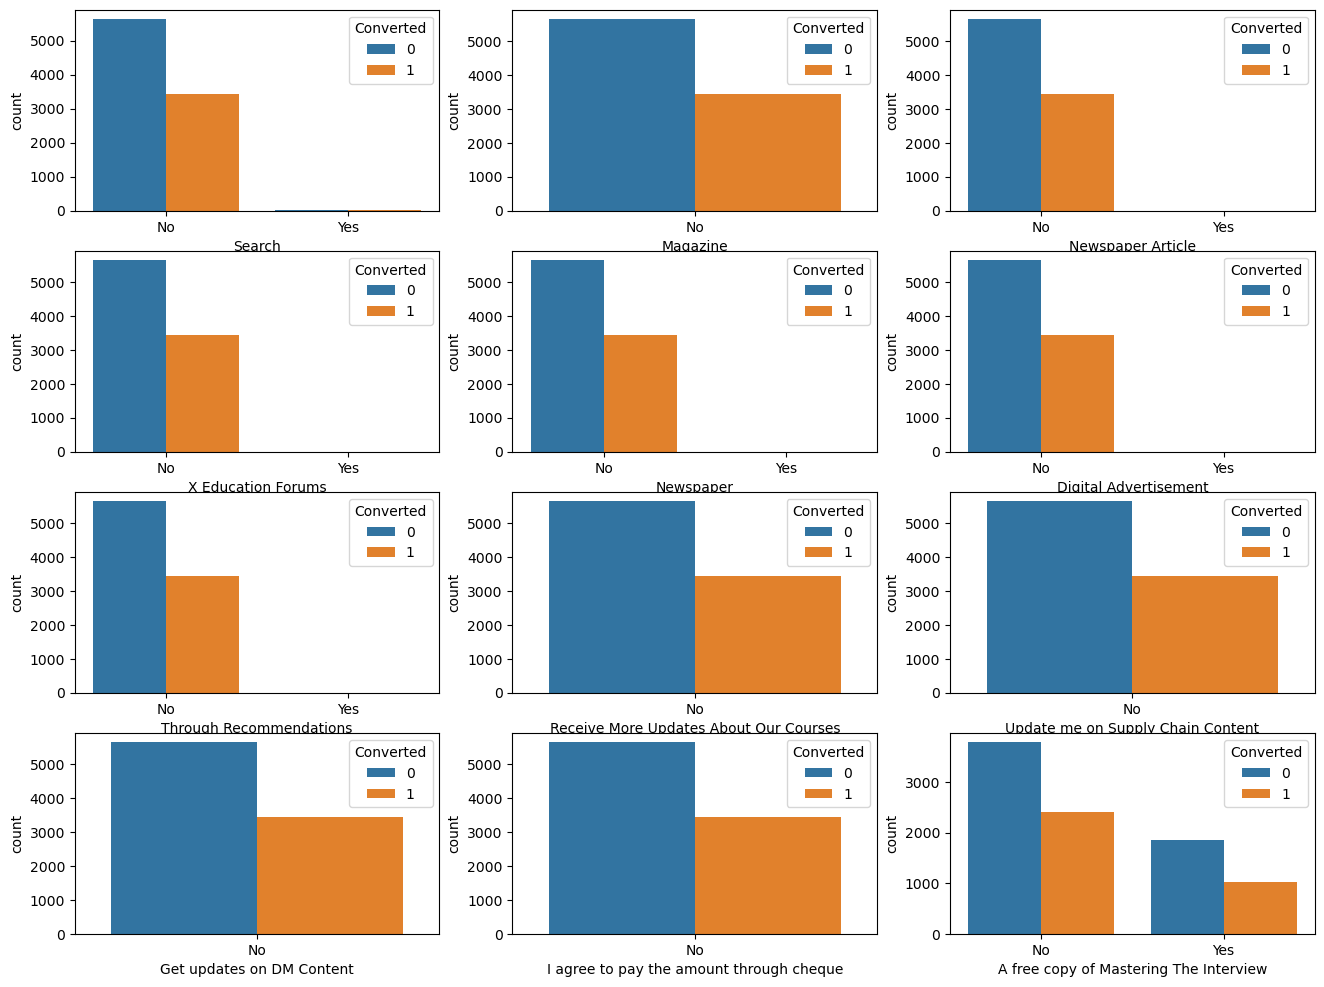

In [63]:
plt.figure(figsize = (16,12))
plt.subplot(4,3,1)
sns.countplot(x="Search", hue="Converted", data=lead)
plt.subplot(4,3,2)
sns.countplot(x="Magazine", hue="Converted", data=lead)
plt.subplot(4,3,3)
sns.countplot(x="Newspaper Article", hue="Converted", data=lead)
plt.subplot(4,3,4)
sns.countplot(x="X Education Forums", hue="Converted", data=lead)
plt.subplot(4,3,5)
sns.countplot(x="Newspaper", hue="Converted", data=lead)
plt.subplot(4,3,6)
sns.countplot(x="Digital Advertisement", hue="Converted", data=lead)
plt.subplot(4,3,7)
sns.countplot(x="Through Recommendations", hue="Converted", data=lead)
plt.subplot(4,3,8)
sns.countplot(x="Receive More Updates About Our Courses", hue="Converted", data=lead)
plt.subplot(4,3,9)
sns.countplot(x="Update me on Supply Chain Content", hue="Converted", data=lead)
plt.subplot(4,3,10)
sns.countplot(x="Get updates on DM Content", hue="Converted", data=lead)
plt.subplot(4,3,11)
sns.countplot(x="I agree to pay the amount through cheque", hue="Converted", data=lead)
plt.subplot(4,3,12)
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=lead)
plt.show()


### Inference from above graph
    
- **Most of the columns have 'No' as categorical value. Hence no inference can be drawn from these columns.**

### 3.13: 'City' Column analysis w.r.t 'Converted' Column

In [64]:
lead['City'].value_counts()

City
Select                         3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

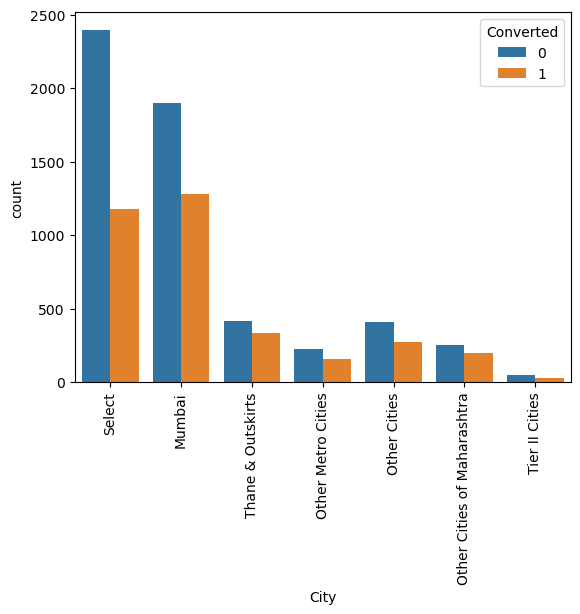

In [65]:
sns.countplot(x="City", hue="Converted", data=lead)
plt.xticks(rotation=90)
plt.show()


### Inference from above graph
    
- **Most of the categorical values have either 'Select' which means lead did not entered city name or 'Mumbai' as categorical value. Focusing more on Mumbai based leads will be benificial.**

### 3.14: 'Last Notable Activity' Column analysis w.r.t 'Converted' Column

In [66]:
lead['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

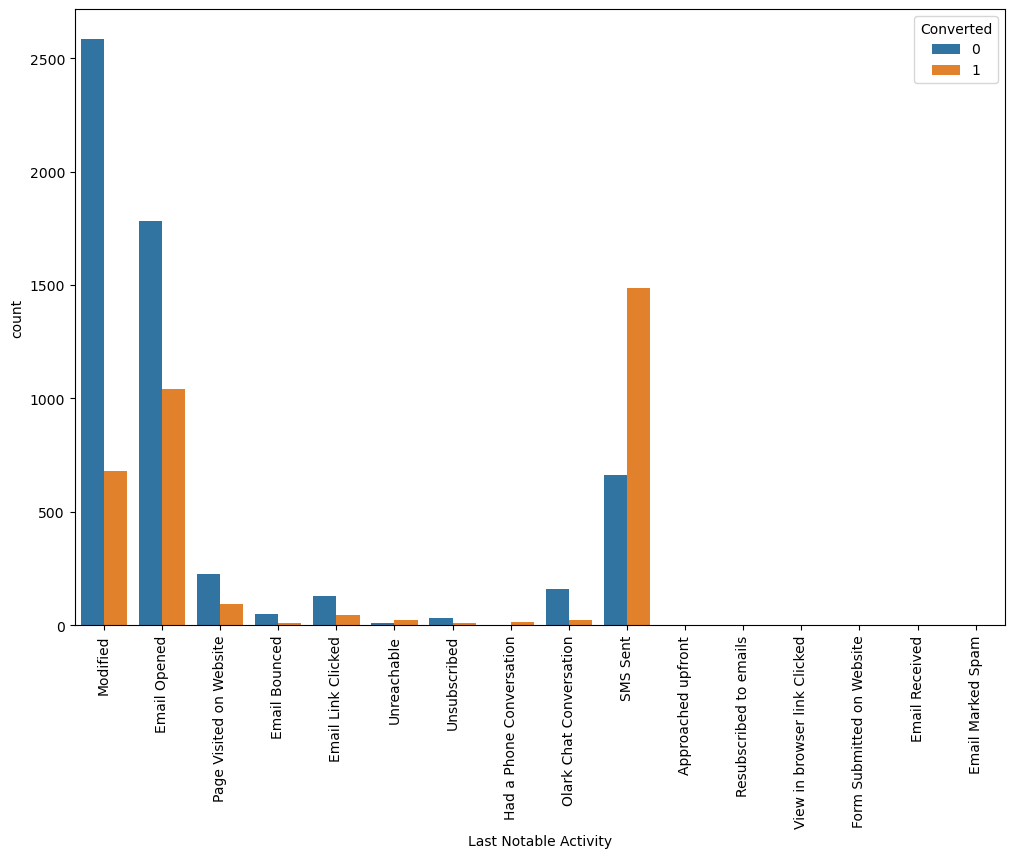

In [67]:
plt.figure(figsize = (12,8))
sns.countplot(x="Last Notable Activity", hue="Converted", data=lead)
plt.xticks(rotation = 90)
plt.show()

  
### Inference from above graph
    
- **Most of the categories in this column have similiarity with the column 'Last Category'. Hence better to drop this column.**


### Observation from Analysis:
**Based on the above analysis we have seen that many columns are not relevant or add up any additional info to the model, hence we can drop them to make the model more efficient and hastle free.**

### 3.15: Drop columns which are irrelevant for development of model

- **Columns to drop: 'Lead Number', 'Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'**

In [68]:
Columns_to_drop = ['Lead Number', 'Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [69]:
lead = lead.drop(Columns_to_drop, axis = 'columns')

In [70]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,City,TotalVisits_bins,Page Views Per Visit_bins
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0,Page Visited on Website,Select,Unemployed,Select,0-5,0-5
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,674,Email Opened,Select,Unemployed,Select,0-5,0-5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,1532,Email Opened,Business Administration,Student,Mumbai,0-5,0-5
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,305,Other Activity,Media and Advertising,Unemployed,Mumbai,0-5,0-5
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,1428,Converted to Lead,Select,Unemployed,Mumbai,0-5,0-5


In [71]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Prospect ID                      9074 non-null   object  
 1   Lead Origin                      9074 non-null   object  
 2   Lead Source                      9074 non-null   object  
 3   Do Not Email                     9074 non-null   object  
 4   Do Not Call                      9074 non-null   object  
 5   Converted                        9074 non-null   int64   
 6   Total Time Spent on Website      9074 non-null   int64   
 7   Last Activity                    9074 non-null   object  
 8   Specialization                   9074 non-null   object  
 9   What is your current occupation  9074 non-null   object  
 10  City                             9074 non-null   object  
 11  TotalVisits_bins                 9074 non-null   category
 12  Page Views 

In [72]:
lead.shape

(9074, 13)

#

## Step 4: Data Preparation for Model Building

### 4.1: Converting Yes/No categories to 1/0:

In [73]:
columns =  ['Do Not Email', 'Do Not Call']

def Binary(x):
    return x.map({'Yes': 1, "No": 0})

lead[columns] = lead[columns].apply(Binary)

In [74]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,City,TotalVisits_bins,Page Views Per Visit_bins
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0,Page Visited on Website,Select,Unemployed,Select,0-5,0-5
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,674,Email Opened,Select,Unemployed,Select,0-5,0-5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,1532,Email Opened,Business Administration,Student,Mumbai,0-5,0-5
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,305,Other Activity,Media and Advertising,Unemployed,Mumbai,0-5,0-5
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,1428,Converted to Lead,Select,Unemployed,Mumbai,0-5,0-5


### 4.2: Creating Dummy Variables for Categorical Columns

- **Dummy to be created for columns: 'Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation', 'City'**

In [76]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_columns = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation', 'City']], drop_first=True)
dummy_columns.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
0,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


### 4.3: Creating Dummy Variables for Categorical bin columns

- **Dummy to be created for categorical bin columns: 'TotalVisits_bins', 'Page Views Per Visit_bins'**


In [77]:
# Creating a dummy variable for the categorical variables.
dummy_bins = pd.get_dummies(lead[['TotalVisits_bins', 'Page Views Per Visit_bins']])
dummy_bins.head()

,TotalVisits_bins_0-5,TotalVisits_bins_6-10,TotalVisits_bins_11-15,TotalVisits_bins_16-20,TotalVisits_bins_21+,Page Views Per Visit_bins_0-5,Page Views Per Visit_bins_6-10,Page Views Per Visit_bins_11-15,Page Views Per Visit_bins_16+
0,True,False,False,False,False,True,False,False,False
1,True,False,False,False,False,True,False,False,False
2,True,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,False
4,True,False,False,False,False,True,False,False,False


### 4.4: Concatinating Dummy columns to Main Dataframe

In [78]:
# Concatenating the dummy_columns to the lead dataframe
lead = pd.concat([lead, dummy_columns], axis=1)

In [79]:
# Concatenating the dummy_bins to the lead dataframe
lead = pd.concat([lead, dummy_bins], axis=1)

In [80]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,...,City_Tier II Cities,TotalVisits_bins_0-5,TotalVisits_bins_6-10,TotalVisits_bins_11-15,TotalVisits_bins_16-20,TotalVisits_bins_21+,Page Views Per Visit_bins_0-5,Page Views Per Visit_bins_6-10,Page Views Per Visit_bins_11-15,Page Views Per Visit_bins_16+
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0,Page Visited on Website,Select,Unemployed,...,False,True,False,False,False,False,True,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,674,Email Opened,Select,Unemployed,...,False,True,False,False,False,False,True,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,1532,Email Opened,Business Administration,Student,...,False,True,False,False,False,False,True,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,305,Other Activity,Media and Advertising,Unemployed,...,False,True,False,False,False,False,True,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,1428,Converted to Lead,Select,Unemployed,...,False,True,False,False,False,False,True,False,False,False


### 4.5: Dropping the columns for which are irrelevant for model building

In [81]:
# Dropping the columns for which dummies were created
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation', 'City','TotalVisits_bins', 'Page Views Per Visit_bins'], axis = 'columns')

In [82]:
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Tier II Cities,TotalVisits_bins_0-5,TotalVisits_bins_6-10,TotalVisits_bins_11-15,TotalVisits_bins_16-20,TotalVisits_bins_21+,Page Views Per Visit_bins_0-5,Page Views Per Visit_bins_6-10,Page Views Per Visit_bins_11-15,Page Views Per Visit_bins_16+
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0,False,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,674,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,1532,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,305,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,1428,True,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False


### 4.6: Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# X dataset is our feature variables
X = lead.drop(['Converted','Prospect ID'], axis = 'columns')

# y is our target variable
y = lead['Converted']

In [85]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 4.7: Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])


In [88]:
X_train.head().T

,3009,1012,9226,4750,7987
Do Not Email,0,1,0,0,0
Do Not Call,0,0,0,0,0
Total Time Spent on Website,-0.160255,-0.540048,-0.88865,1.643304,2.017593
Lead Origin_Landing Page Submission,True,True,False,True,True
Lead Origin_Lead Add Form,False,False,False,False,False
Lead Origin_Lead Import,False,False,False,False,False
Lead Source_Google,False,False,False,False,False
Lead Source_Olark Chat,False,False,True,False,False
Lead Source_Organic Search,False,False,False,False,False
Lead Source_Others,False,False,False,False,False


### 4.8: Feature Selection using RFE

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [90]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [91]:
# 20 Columns selected by RFE for model building
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Select',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'TotalVisits_bins_0-5', 'TotalVisits_bins_21+',
       'Page Views Per Visit_bins_6-10'],
      dtype='object')

#

## Step 5: Model Building & Training the Model

### 5.1: Model 1

In [92]:
import statsmodels.api as sm

In [93]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

 
- **P value of 'What is your current occupation_Housewife' variable is 99% which indicates co-efficient is not significant. Hence drop the column from model.**

In [94]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

### 5.2: Model 2:

In [95]:
# Model fit after deleting 'What is your current occupation_Housewife'
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

 
- **P value of 'What is your current occupation_Working Professional' variable is 70% which indicates co-efficient is not significant. Hence drop the column from model.**

In [96]:
# Dropping the column 'What is your current occupation_Working Professional'
col1 = col1.drop('What is your current occupation_Working Professional')

### 5.3: Model 3:

In [97]:
# Model fit after deleting 'What is your current occupation_Working Professional'
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).


- **P value of 'Specialization_Hospitality Management' variable is 8%(More than 5%) which indicates co-efficient is not significant. Hence drop the column from model.**

In [98]:
# Dropping the column 'Specialization_Hospitality Management'
col1 = col1.drop('Specialization_Hospitality Management')

### 5.4: Model 4:

In [99]:
# Model fit after deleting 'Specialization_Hospitality Management'
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).


- **P value of all variables are well within range. Lets check for VIF values for multi-collinearity between variables**

#### Checking VIF values:

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


- **VIF value of 'TotalVisits_bins_0-5' variable is 6.99(more than 3). Hence shows high collinearity with other variables. So dropping 'TotalVisits_bins_0-5'**

In [102]:
# Dropping the column 'TotalVisits_bins_0-5'
col1 = col1.drop('TotalVisits_bins_0-5')

### 5.5: Model 5:

In [103]:
# Model fit after deleting 'TotalVisits_bins_0-5'
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).


- **P value of all variables are well within range. Lets check for VIF values for multi-collinearity between variables**

#### Checking VIF values:

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


- **VIF value of 'What is your current occupation_Unemployed' variable is 6.11(more than 3). Hence shows high collinearity with other variables. So dropping 'What is your current occupation_Unemployed'**

In [ ]:
# Dropping the column 'What is your current occupation_Unemployed'
col1 = col1.drop('What is your current occupation_Unemployed')

### 5.6: Model 6:

In [ ]:
# Model fit after deleting 'What is your current occupation_Unemployed'
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


- **P value of 'What is your current occupation_Student' variable is 8%(More than 5%) which indicates co-efficient is not significant. Hence drop the column from model.**

In [ ]:
# Dropping the column 'What is your current occupation_Student'
col1 = col1.drop('What is your current occupation_Student')

### 5.7: Model 7:

In [ ]:
# Model fit after deleting 'What is your current occupation_Student'
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


- **P value of all variables are well within range. Lets check for VIF values for multi-collinearity between variables**

#### Checking VIF values:

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


- **VIF value of 'Lead Origin_Lead Add Form' variable is 4.48(more than 3). Hence shows high collinearity with other variables. So dropping 'Lead Origin_Lead Add Form'**

In [ ]:
# Dropping the column 'Lead Origin_Lead Add Form'
col1 = col1.drop('Lead Origin_Lead Add Form')

### 5.8: Model 8:

In [ ]:
# Model fit after deleting 'Lead Origin_Lead Add Form'
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


- **P value of all variables are well within range. Lets check for VIF values for multi-collinearity between variables**

#### Checking VIF values:

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


- **Both P values and VIF values of all the variables are well within range(P Values<5% and VIF Values<3). Hence model is trained and ready for evaluation.**

#

## Step 6: Model Evaluation

### 6.1: Making Prediction on Train Set

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(20)

### 6.2: Choosing cut-off probability for predicted labels 

**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

### 6.3: Confusion matrix

In [ ]:
from sklearn import metrics

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3365      540
# converted            804       1642  

In [ ]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

### 6.4: Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

In [ ]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))


### Inference from above matrix:    

#### We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
#### We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### 6.5: Ploting ROC Curve:

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


### Inference from above ROC Curve:


**Since we have higher area under the ROC curve , therefore our model is a good one.**

### Finding Optimal Cutoff Point

**Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**

### 6.6: Finding Suitable Probability Cut-off

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


### Inference from above graph:

**From the curve above, 0.4 is the optimum point to take it as a cutoff probability.**


In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head(20)

### 6.7: Assigning Lead Score to the Training data

In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

### 6.8: Model Evaluation

In [ ]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

In [ ]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

In [ ]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

In [ ]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

## Step 7 : Prediction on Test set

### 7.1: Feature Scaling of Test Data

In [ ]:
X_test.head()

In [ ]:
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

### 7.2: Assigning Columns of Final Model to Test dataset

In [ ]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

### 7.3: Adding Constant to X_test dataset

In [ ]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

### 7.4: Test Prediction comparision 

In [ ]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [ ]:
y_pred_final.head(20)

In [ ]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

In [ ]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

In [ ]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()


## Results :

### 1) Comparing the values obtained for Train & Test:

#### -Train Data:__________________________________-Test Data: 

* **Accuracy : 78.8 %**______________________* **Accuracy : 79.5 %**
* **Sensitivity : 67.1 %**____________________* **Sensitivity : 76.5 %**
* **Specificity : 86.1 %**____________________* **Specificity : 80.7 %**


**Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.**

In [ ]:
# High probability convertion leads:
high_prob_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
high_prob_leads


**So there are 291 leads which can be contacted and have a high chance of getting converted.  The Prospect ID of the customers to be contacted are :**

In [ ]:
print("The Prospect ID of the customers which should be contacted are :")

high_prob_lead_ids = high_prob_leads["Prospect ID"].values.reshape(-1)
high_prob_lead_ids

In [ ]:
# Important features to be considered for predict lead conversions from Model:
res.params.sort_values(ascending=False)

## Recommendations:

* The company **should make calls** to the leads coming from the `lead sources "Reference"` as these are more likely to get converted.
* The company **should make calls** to the leads who have their `last Activity` as the `"SMS Sent"` as they are more likely to get converted.
* The company **should make calls** to the leads who's `TotalVisits>21 times` and are `" spend more time on the websites"` as these are more likely to get converted.
* The company **should make calls** to the leads coming from the `lead sources "Olark Chat"` as these are more likely to get converted.

* The company **should not make calls** to the leads whose `last activity` was `"Olark Chat Conversation"` as they are not likely to get converted.
* The company **should not make calls** to the leads whose `lead origin` is `"Landing Page Submission"` as they are not likely to get converted.
* The company **should not make calls** to the leads whose `Specialization` was `"Select"` as they are not likely to get converted.
* The company **should not make calls** to the leads who chose the option of `"Do not Email" as "yes"` as they are not likely to get converted.
* The company **should not make calls** to the leads who's `Current Occupation` is `Other` as they are not likely to get converted.